In [1]:
# veri oluşturma

import pandas as pd
import numpy as np 

In [2]:
sozluk = {'İsim':pd.Series(['Ada','Cem','Sibel','Ahmet','Mehmet','Ali','Veli',
          'Ayşe','Hüseyin','Necmi','Nalan','Namık']),
          'Meslek':pd.Series(['işçi','işçi','memur','serbest','serbest',None,None,
          'sigortacı','işsiz',None,None,'memur']),
          'Tarih':pd.Series(['11.11.2010','11.11.2010','11.11.2010','18.11.2011','18.11.2011',None,None,
          None,'11.11.2010',None,'18.11.2011','18.11.2011']),          
          'Yaş':pd.Series([21, 24, 25, 44, 31, 27, 35, 33, 42, 29, 41, 43]),
          'ÇocukSayısı':pd.Series([None, None, None, None, None, 1, 2, 0, None, None, None, None]),
          'Puan':pd.Series([89, 87, 77, 55, 70, 79, 73, 79, 54, 92, 61, 69])}
df = pd.DataFrame(sozluk)
df

,İsim,Meslek,Tarih,Yaş,ÇocukSayısı,Puan
0,Ada,işçi,11.11.2010,21,NaN,89
1,Cem,işçi,11.11.2010,24,NaN,87
2,Sibel,memur,11.11.2010,25,NaN,77
3,Ahmet,serbest,18.11.2011,44,NaN,55
4,Mehmet,serbest,18.11.2011,31,NaN,70
5,Ali,None,None,27,1.0,79
6,Veli,None,None,35,2.0,73
7,Ayşe,sigortacı,None,33,0.0,79
8,Hüseyin,işsiz,11.11.2010,42,NaN,54
9,Necmi,None,None,29,NaN,92


In [6]:
# hangi hücrede boş değer var
df.isnull().sum()

İsim           0
Meslek         4
Tarih          4
Yaş            0
ÇocukSayısı    9
Puan           0
dtype: int64

In [7]:
# toplam boş değer sayısı
df.isnull().sum().sum()

17

In [8]:
# eksik değer tablosu

def eksik_deger_tablosu(df):
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * eksik_deger/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0: 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
    
    
eksik_deger_tablosu(df)    

,Eksik Değerler,% Değeri
İsim,0,0.000000
Meslek,4,33.333333
Tarih,4,33.333333
Yaş,0,0.000000
ÇocukSayısı,9,75.000000
Puan,0,0.000000


In [11]:
# eşik değerine göre az olan sütunu çıkarma
thresh = len(df) * .3
df.dropna(thresh=thresh,  axis=1, inplace=True)

df

,İsim,Meslek,Tarih,Yaş,Puan
0,Ada,işçi,11.11.2010,21,89
1,Cem,işçi,11.11.2010,24,87
2,Sibel,memur,11.11.2010,25,77
3,Ahmet,serbest,18.11.2011,44,55
4,Mehmet,serbest,18.11.2011,31,70
5,Ali,None,None,27,79
6,Veli,None,None,35,73
7,Ayşe,sigortacı,None,33,79
8,Hüseyin,işsiz,11.11.2010,42,54
9,Necmi,None,None,29,92


In [16]:
# DataFrame deki None değerlerine değer atama

#df['Meslek'] = df['Meslek'].fillna('Diğer')
#print(df['Tarih'].unique()[0])
df['Tarih'] = df['Tarih'].fillna(df['Tarih'].unique()[0])

df

,İsim,Meslek,Tarih,Yaş,Puan
0,Ada,işçi,11.11.2010,21,89
1,Cem,işçi,11.11.2010,24,87
2,Sibel,memur,11.11.2010,25,77
3,Ahmet,serbest,18.11.2011,44,55
4,Mehmet,serbest,18.11.2011,31,70
5,Ali,Diğer,11.11.2010,27,79
6,Veli,Diğer,11.11.2010,35,73
7,Ayşe,sigortacı,11.11.2010,33,79
8,Hüseyin,işsiz,11.11.2010,42,54
9,Necmi,Diğer,11.11.2010,29,92


In [17]:
# yeni öznitelikler oluşturma (Feature Extraction)

def basari_durumu(puan):
    return (puan >= 70)

df['Geçti'] = df['Puan'].apply(basari_durumu)
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti
0,Ada,işçi,11.11.2010,21,89,True
1,Cem,işçi,11.11.2010,24,87,True
2,Sibel,memur,11.11.2010,25,77,True
3,Ahmet,serbest,18.11.2011,44,55,False
4,Mehmet,serbest,18.11.2011,31,70,True
5,Ali,Diğer,11.11.2010,27,79,True
6,Veli,Diğer,11.11.2010,35,73,True
7,Ayşe,sigortacı,11.11.2010,33,79,True
8,Hüseyin,işsiz,11.11.2010,42,54,False
9,Necmi,Diğer,11.11.2010,29,92,True


In [18]:
tarih = pd.to_datetime(df['Tarih'])
df['Yıl'] = tarih.dt.year

df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl
0,Ada,işçi,11.11.2010,21,89,True,2010
1,Cem,işçi,11.11.2010,24,87,True,2010
2,Sibel,memur,11.11.2010,25,77,True,2010
3,Ahmet,serbest,18.11.2011,44,55,False,2011
4,Mehmet,serbest,18.11.2011,31,70,True,2011
5,Ali,Diğer,11.11.2010,27,79,True,2010
6,Veli,Diğer,11.11.2010,35,73,True,2010
7,Ayşe,sigortacı,11.11.2010,33,79,True,2010
8,Hüseyin,işsiz,11.11.2010,42,54,False,2010
9,Necmi,Diğer,11.11.2010,29,92,True,2010


In [20]:
# kategorik değerleri dönüştürme (label/one-hot-encoding)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Geçti_Encoded'] = label_encoder.fit_transform(df['Geçti'])
df['Meslek_Encoded'] = label_encoder.fit_transform(df['Meslek'])
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Geçti_Encoded,Meslek_Encoded
0,Ada,işçi,11.11.2010,21,89,True,2010,1,2
1,Cem,işçi,11.11.2010,24,87,True,2010,1,2
2,Sibel,memur,11.11.2010,25,77,True,2010,1,3
3,Ahmet,serbest,18.11.2011,44,55,False,2011,0,4
4,Mehmet,serbest,18.11.2011,31,70,True,2011,1,4
5,Ali,Diğer,11.11.2010,27,79,True,2010,1,0
6,Veli,Diğer,11.11.2010,35,73,True,2010,1,0
7,Ayşe,sigortacı,11.11.2010,33,79,True,2010,1,5
8,Hüseyin,işsiz,11.11.2010,42,54,False,2010,0,1
9,Necmi,Diğer,11.11.2010,29,92,True,2010,1,0


In [21]:
OneHotEncoding = preprocessing.OneHotEncoder
df['Meslek'] = pd.Categorical(df['Meslek'])
dfDummies = pd.get_dummies(df['Meslek'], prefix='Kat')
dfDummies

,Kat_Diğer,Kat_işsiz,Kat_işçi,Kat_memur,Kat_serbest,Kat_sigortacı
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,0,0,0,0,0,1
8,0,1,0,0,0,0
9,1,0,0,0,0,0


In [22]:
df_new = pd.concat([df, dfDummies], axis=1)

In [24]:
df_new

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Geçti_Encoded,Meslek_Encoded,Kat_Diğer,Kat_işsiz,Kat_işçi,Kat_memur,Kat_serbest,Kat_sigortacı
0,Ada,işçi,11.11.2010,21,89,True,2010,1,2,0,0,1,0,0,0
1,Cem,işçi,11.11.2010,24,87,True,2010,1,2,0,0,1,0,0,0
2,Sibel,memur,11.11.2010,25,77,True,2010,1,3,0,0,0,1,0,0
3,Ahmet,serbest,18.11.2011,44,55,False,2011,0,4,0,0,0,0,1,0
4,Mehmet,serbest,18.11.2011,31,70,True,2011,1,4,0,0,0,0,1,0
5,Ali,Diğer,11.11.2010,27,79,True,2010,1,0,1,0,0,0,0,0
6,Veli,Diğer,11.11.2010,35,73,True,2010,1,0,1,0,0,0,0,0
7,Ayşe,sigortacı,11.11.2010,33,79,True,2010,1,5,0,0,0,0,0,1
8,Hüseyin,işsiz,11.11.2010,42,54,False,2010,0,1,0,1,0,0,0,0
9,Necmi,Diğer,11.11.2010,29,92,True,2010,1,0,1,0,0,0,0,0


In [25]:
#Veriyi Ölçeklendirme ve Normalize Etme

x = df[['Puan']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['Puan2'] = pd.DataFrame(x_scaled)

df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Geçti_Encoded,Meslek_Encoded,Puan2
0,Ada,işçi,11.11.2010,21,89,True,2010,1,2,0.921053
1,Cem,işçi,11.11.2010,24,87,True,2010,1,2,0.868421
2,Sibel,memur,11.11.2010,25,77,True,2010,1,3,0.605263
3,Ahmet,serbest,18.11.2011,44,55,False,2011,0,4,0.026316
4,Mehmet,serbest,18.11.2011,31,70,True,2011,1,4,0.421053
5,Ali,Diğer,11.11.2010,27,79,True,2010,1,0,0.657895
6,Veli,Diğer,11.11.2010,35,73,True,2010,1,0,0.500000
7,Ayşe,sigortacı,11.11.2010,33,79,True,2010,1,5,0.657895
8,Hüseyin,işsiz,11.11.2010,42,54,False,2010,0,1,0.000000
9,Necmi,Diğer,11.11.2010,29,92,True,2010,1,0,1.000000


In /home/furkan/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/furkan/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/furkan/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/furkan/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/furkan/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


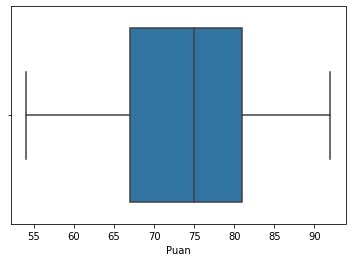

In [26]:
#outliers

import seaborn as sns
sns.boxplot(x=df.Puan)

In [27]:
Q1 = df.Puan.quantile(0.25)
Q2 = df.Puan.quantile(0.5)
Q3 = df.Puan.quantile(0.75)
Q4 = df.Puan.quantile(1)
IQR = Q3 - Q1

print("Q1-->", Q1)
print("Q3-->", Q3)
print("Q2-->", Q2)
print("Q4-->", Q4)
print("IQR-->", IQR)
print("Alt sınır: Q1 - 1.5 * IQR--->", Q1 - 1.5 * IQR)
print("Üst sınır: Q3 + 1.5 * IQR--->", Q3 + 1.5 * IQR)

Q1--> 67.0
Q3--> 81.0
Q2--> 75.0
Q4--> 92.0
IQR--> 14.0
Alt sınır: Q1 - 1.5 * IQR---> 46.0
Üst sınır: Q3 + 1.5 * IQR---> 102.0


In [28]:
outliers_df = df[(df.Puan < (Q1-1.5*IQR))|(df.Puan > Q3+1.5*IQR)]

In [30]:
outliers_df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Geçti_Encoded,Meslek_Encoded,Puan2
